<a href="https://colab.research.google.com/github/MyAppsTest/Telecom_2da_parte/blob/main/Telecom2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TELECOM

##Documentacion

Diccionario de datos
- customerID: n√∫mero de identificaci√≥n √∫nico de cada cliente
-Churn: si el cliente dej√≥ o no la empresa
-gender: g√©nero (masculino y femenino)
-SeniorCitizen: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
-Partner: si el cliente tiene o no una pareja
-Dependents: si el cliente tiene o no dependientes
-tenure: meses de contrato del cliente
-PhoneService: suscripci√≥n al servicio telef√≥nico
-MultipleLines: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
-InternetService: suscripci√≥n a un proveedor de internet
-OnlineSecurity: suscripci√≥n adicional de seguridad en l√≠nea
-OnlineBackup: suscripci√≥n adicional de respaldo en l√≠nea
-DeviceProtection: suscripci√≥n adicional de protecci√≥n del dispositivo
-TechSupport: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
-StreamingTV: suscripci√≥n de televisi√≥n por cable
-StreamingMovies: suscripci√≥n de streaming de pel√≠culas
-Contract: tipo de contrato
-PaperlessBilling: si el cliente prefiere recibir la factura en l√≠nea
-PaymentMethod: forma de pago
-Charges.Monthly: total de todos los servicios del cliente por mes
-Charges.Total: total gastado por el cliente

##1era parte

###ETL

In [43]:
link = "https://raw.githubusercontent.com/MyAppsTest/Telecom_2da_parte/refs/heads/main/TelecomX_Data.json"

In [44]:
import pandas as pd

In [45]:
datos = pd.read_json(link)

In [46]:
datos

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

In [47]:
#normalizaci√≥n de cada columna
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

# Unir todas las partes en un solo DataFrame
df = pd.concat(
    [datos[['customerID', 'Churn' ]], customer_df, phone_df, internet_df, account_df],
    axis=1
)

In [48]:
df

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7267 rows x 21 columns]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [50]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [51]:
df.shape

(7267, 21)

In [52]:
#Valores nulos
print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [53]:
print(df.isna().sum().sum())

0


In [54]:
#duplicados
print(df.duplicated().sum())

0


In [59]:
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

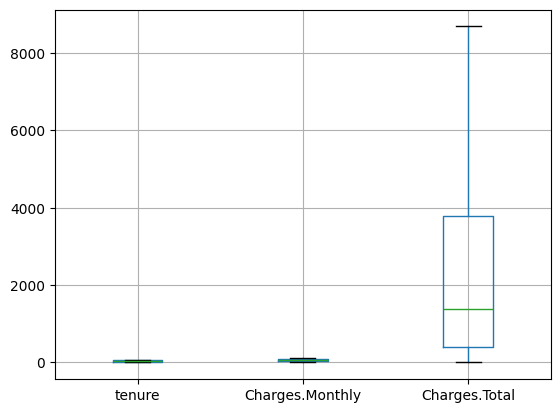

In [60]:
import matplotlib.pyplot as plt
df[['tenure','Charges.Monthly','Charges.Total']].boxplot()
plt.show()

In [61]:
cols_binarias = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV',
                 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in cols_binarias:
    print(f"{col}: {df[col].unique()}")

SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
Churn: ['No' 'Yes' '']


In [62]:
df.describe()

SeniorCitizen       tenure  Charges.Monthly  Charges.Total
count    7267.000000  7267.000000      7267.000000    7256.000000
mean        0.162653    32.346498        64.720098    2280.634213
std         0.369074    24.571773        30.129572    2268.632997
min         0.000000     0.000000        18.250000      18.800000
25%         0.000000     9.000000        35.425000     400.225000
50%         0.000000    29.000000        70.300000    1391.000000
75%         0.000000    55.000000        89.875000    3785.300000
max         1.000000    72.000000       118.750000    8684.800000

In [56]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False))


Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Columna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Columna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Columna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Columna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Columna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Columna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Columna: OnlineSecurity
OnlineSecurity
No                     3608
Yes      

In [57]:
print(df.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [63]:
df['Cuentas_Diarias'] = df['Charges.Total'] / (df['tenure'] * 30)

In [64]:
print(df[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head())

   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO             65.6         2.197407
1  0003-MKNFE             59.9         2.008889
2  0004-TLHLJ             73.9         2.340417
3  0011-IGKFF             98.0         3.173974
4  0013-EXCHZ             83.9         2.971111


In [66]:
#evaluando los valores para luego cambiarlos a binarios
# 1. Ver valores √∫nicos por columna categ√≥rica (para revisar qu√© formato tienen)
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumna: {col}")
    print(df[col].unique())

# 2. Definir columnas candidatas para binarizaci√≥n
cols_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# 3. Normalizar valores y convertir a binario
for col in cols_binarias:
    df[col] = df[col].str.strip().str.lower()  # limpia espacios y pasa a min√∫sculas
    df[col] = df[col].replace({'s√≠': 1, 'si': 1, 'yes': 1, 'no': 0})

# 4. SeniorCitizen ya deber√≠a estar en 0 y 1 (si no, puedes forzarlo as√≠):
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 1 if x == 1 else 0)

# 5. Revisar resultados
print(df[cols_binarias + ['SeniorCitizen']].head())


Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['No' 'Yes' '']

Columna: gender
['Female' 'Male']

Columna: Partner
['Yes' 'No']

Columna: Dependents
['Yes' 'No']

Columna: PhoneService
['Yes' 'No']

Columna: MultipleLines
['No' 'Yes' 'No phone service']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: OnlineBackup
['Yes' 'No' 'No internet service']

Columna: DeviceProtection
['No' 'Yes' 'No internet service']

Columna: TechSupport
['Yes' 'No' 'No internet service']

Columna: StreamingTV
['Yes' 'No' 'No internet service']

Columna: StreamingMovies
['No' 'Yes' 'No internet service']

Columna: Contract
['One year' 'Month-to-month' 'Two year']

Columna: PaperlessBilling
['Yes' 'No']

Columna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
  Churn  Partner  Dependents  PhoneService Mult

/tmp/ipython-input-3855643885.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'s√≠': 1, 'si': 1, 'yes': 1, 'no': 0})


In [68]:
#cambiando valores a binarios

import numpy as np
# --- Churn ---
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})

# --- Binarias simples ---
binarias_simples = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binarias_simples:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

# --- Columnas con opci√≥n "No phone service" ---
df['MultipleLines'] = df['MultipleLines'].replace({
    'Yes': 1, 'No': 0, 'No phone service': 0
})

# --- Columnas con opci√≥n "No internet service" ---
cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_internet:
    df[col] = df[col].replace({
        'Yes': 1, 'No': 0, 'No internet service': 0
    })

# --- SeniorCitizen ---
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 1 if x == 1 else 0)

# ‚úÖ Revisar resultado
print(df[['Churn','Partner','Dependents','PhoneService','MultipleLines',
          'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
          'StreamingTV','StreamingMovies','PaperlessBilling','SeniorCitizen']].head())

   Churn  Partner  Dependents  PhoneService MultipleLines OnlineSecurity  \
0    0.0        1           1             1             0              0   
1    0.0        0           0             1             1              0   
2    1.0        0           0             1             0              0   
3    1.0        1           0             1             0              0   
4    1.0        1           0             1             0              0   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0            1                0           1           1               0   
1            0                0           0           0               1   
2            0                1           0           0               0   
3            1                1           0           1               1   
4            0                0           1           1               0   

   PaperlessBilling  SeniorCitizen  
0                 1              0  
1                 

/tmp/ipython-input-1271949128.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})


In [69]:
# An√°lisis descriptivo de todas las columnas num√©ricas
desc_num = df.describe().T  # Transpuesta para mejor lectura
desc_num['median'] = df.median(numeric_only=True)  # Agregamos la mediana
print(desc_num)

                   count         mean          std        min         25%  \
Churn             7043.0     0.265370     0.441561   0.000000    0.000000   
SeniorCitizen     7267.0     0.162653     0.369074   0.000000    0.000000   
Partner           7267.0     0.484106     0.499782   0.000000    0.000000   
Dependents        7267.0     0.300124     0.458343   0.000000    0.000000   
tenure            7267.0    32.346498    24.571773   0.000000    9.000000   
PhoneService      7267.0     0.902711     0.296371   0.000000    1.000000   
PaperlessBilling  7267.0     0.593230     0.491265   0.000000    0.000000   
Charges.Monthly   7267.0    64.720098    30.129572  18.250000   35.425000   
Charges.Total     7256.0  2280.634213  2268.632997  18.800000  400.225000   
Cuentas_Diarias   7256.0     2.158564     1.007442   0.459167    1.191667   

                          50%          75%          max       median  
Churn                0.000000     1.000000     1.000000     0.000000  
SeniorCiti

In [70]:
#metricas de dispersion
# Coeficiente de variaci√≥n = std/mean
desc_num['cv'] = desc_num['std'] / desc_num['mean']

# Rango intercuart√≠lico (IQR = Q3 - Q1)
desc_num['iqr'] = desc_num['75%'] - desc_num['25%']

print(desc_num[['mean','median','std','cv','iqr']])


                         mean       median          std        cv          iqr
Churn                0.265370     0.000000     0.441561  1.663947     1.000000
SeniorCitizen        0.162653     0.000000     0.369074  2.269089     0.000000
Partner              0.484106     0.000000     0.499782  1.032380     1.000000
Dependents           0.300124     0.000000     0.458343  1.527180     1.000000
tenure              32.346498    29.000000    24.571773  0.759642    46.000000
PhoneService         0.902711     1.000000     0.296371  0.328313     0.000000
PaperlessBilling     0.593230     1.000000     0.491265  0.828120     1.000000
Charges.Monthly     64.720098    70.300000    30.129572  0.465537    54.450000
Charges.Total     2280.634213  1391.000000  2268.632997  0.994738  3385.075000
Cuentas_Diarias      2.158564     2.341667     1.007442  0.466718     1.814319


In [71]:
#distribucion de columnas categoricas
# Conteo y proporci√≥n de valores en variables categ√≥ricas
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(normalize=True) * 100)  # proporciones %



Columna: customerID
customerID
9995-HOTOH    0.013761
0002-ORFBO    0.013761
0003-MKNFE    0.013761
9970-QBCDA    0.013761
9968-FFVVH    0.013761
                ...   
0014-BMAQU    0.013761
0013-SMEOE    0.013761
0013-MHZWF    0.013761
0013-EXCHZ    0.013761
0011-IGKFF    0.013761
Name: proportion, Length: 7267, dtype: float64

Columna: gender
gender
Male      50.571075
Female    49.428925
Name: proportion, dtype: float64

Columna: MultipleLines
MultipleLines
0                   48.094124
1                   42.176964
no phone service     9.728912
Name: proportion, dtype: float64

Columna: InternetService
InternetService
Fiber optic    44.007156
DSL            34.236962
No             21.755883
Name: proportion, dtype: float64

Columna: OnlineSecurity
OnlineSecurity
0                      49.649099
1                      28.595019
no internet service    21.755883
Name: proportion, dtype: float64

Columna: OnlineBackup
OnlineBackup
0                      43.786982
1                  

In [72]:
#analisis variable Churn
# Distribuci√≥n de Churn
churn_rate = df['Churn'].mean() * 100
print(f"Tasa de Churn: {churn_rate:.2f}%")

# Churn por g√©nero
print(df.groupby('gender')['Churn'].mean())

# Churn por tipo de contrato
print(df.groupby('Contract')['Churn'].mean())


Tasa de Churn: 26.54%
gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


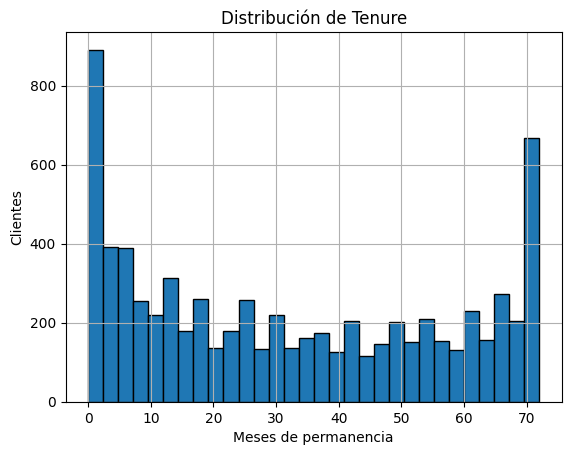

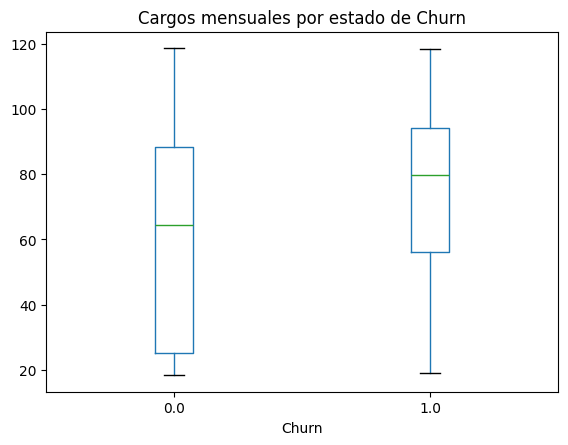

In [73]:
import matplotlib.pyplot as plt

# Histograma de tenure
df['tenure'].hist(bins=30, edgecolor='black')
plt.title('Distribuci√≥n de Tenure')
plt.xlabel('Meses de permanencia')
plt.ylabel('Clientes')
plt.show()

# Boxplot de cargos mensuales
df.boxplot(column='Charges.Monthly', by='Churn', grid=False)
plt.title('Cargos mensuales por estado de Churn')
plt.suptitle('')
plt.show()


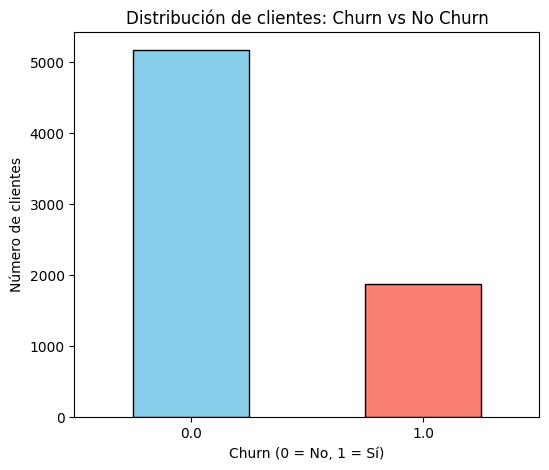

In [74]:
#Distribucion de evasion
import matplotlib.pyplot as plt

# Conteo de clientes por estado de churn
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6,5))
churn_counts.plot(kind='bar', color=['skyblue','salmon'], edgecolor='black')
plt.title('Distribuci√≥n de clientes: Churn vs No Churn')
plt.xlabel('Churn (0 = No, 1 = S√≠)')
plt.ylabel('N√∫mero de clientes')
plt.xticks(rotation=0)
plt.show()


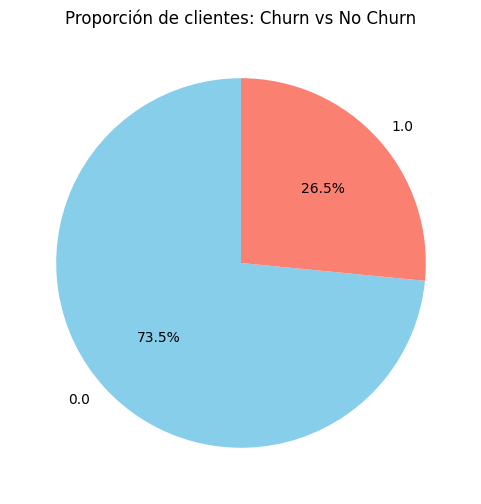

In [75]:
plt.figure(figsize=(6,6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.ylabel('')
plt.title('Proporci√≥n de clientes: Churn vs No Churn')
plt.show()


In [76]:
churn_rate = df['Churn'].mean() * 100
print(f"Tasa de churn: {churn_rate:.2f}%")


Tasa de churn: 26.54%


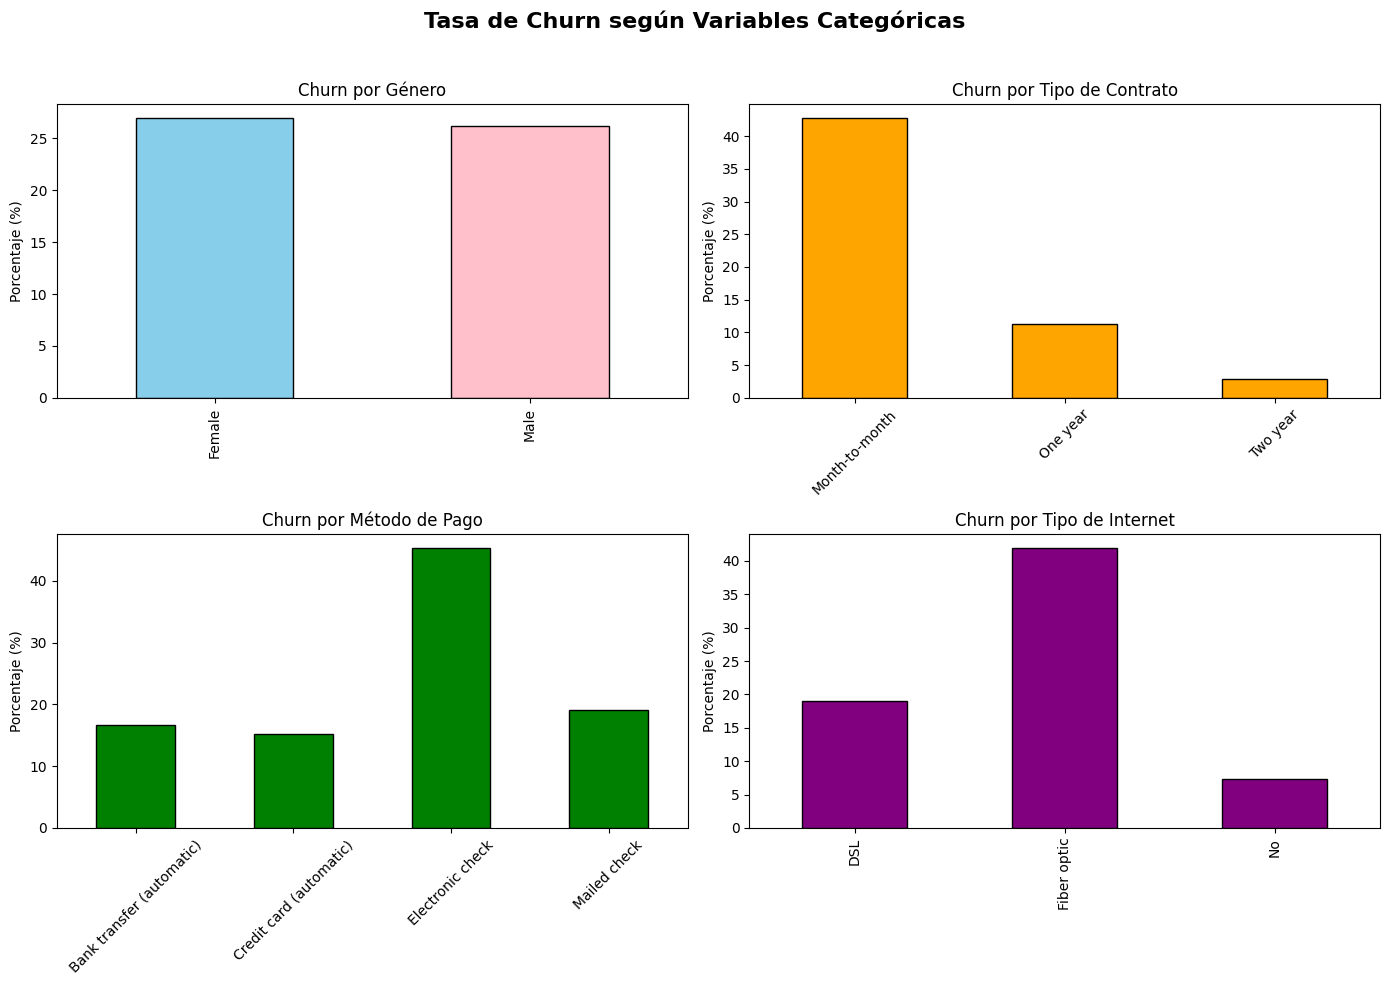

In [81]:
import matplotlib.pyplot as plt

# --- Agrupaciones ---
churn_gender = df.groupby('gender')['Churn'].mean() * 100
churn_contract = df.groupby('Contract')['Churn'].mean() * 100
churn_payment = df.groupby('PaymentMethod')['Churn'].mean() * 100
churn_internet = df.groupby('InternetService')['Churn'].mean() * 100

# --- Crear subplots ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('Tasa de Churn seg√∫n Variables Categ√≥ricas', fontsize=16, fontweight='bold')

# 1. G√©nero
churn_gender.plot(kind='bar', color=['skyblue','pink'], edgecolor='black', ax=axes[0,0])
axes[0,0].set_title('Churn por G√©nero')
axes[0,0].set_ylabel('Porcentaje (%)')
axes[0,0].set_xlabel('')

# 2. Tipo de Contrato
churn_contract.plot(kind='bar', color='orange', edgecolor='black', ax=axes[0,1])
axes[0,1].set_title('Churn por Tipo de Contrato')
axes[0,1].set_ylabel('Porcentaje (%)')
axes[0,1].set_xlabel('')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. M√©todo de Pago
churn_payment.plot(kind='bar', color='green', edgecolor='black', ax=axes[1,0])
axes[1,0].set_title('Churn por M√©todo de Pago')
axes[1,0].set_ylabel('Porcentaje (%)')
axes[1,0].set_xlabel('')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Internet Service
churn_internet.plot(kind='bar', color='purple', edgecolor='black', ax=axes[1,1])
axes[1,1].set_title('Churn por Tipo de Internet')
axes[1,1].set_ylabel('Porcentaje (%)')
axes[1,1].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


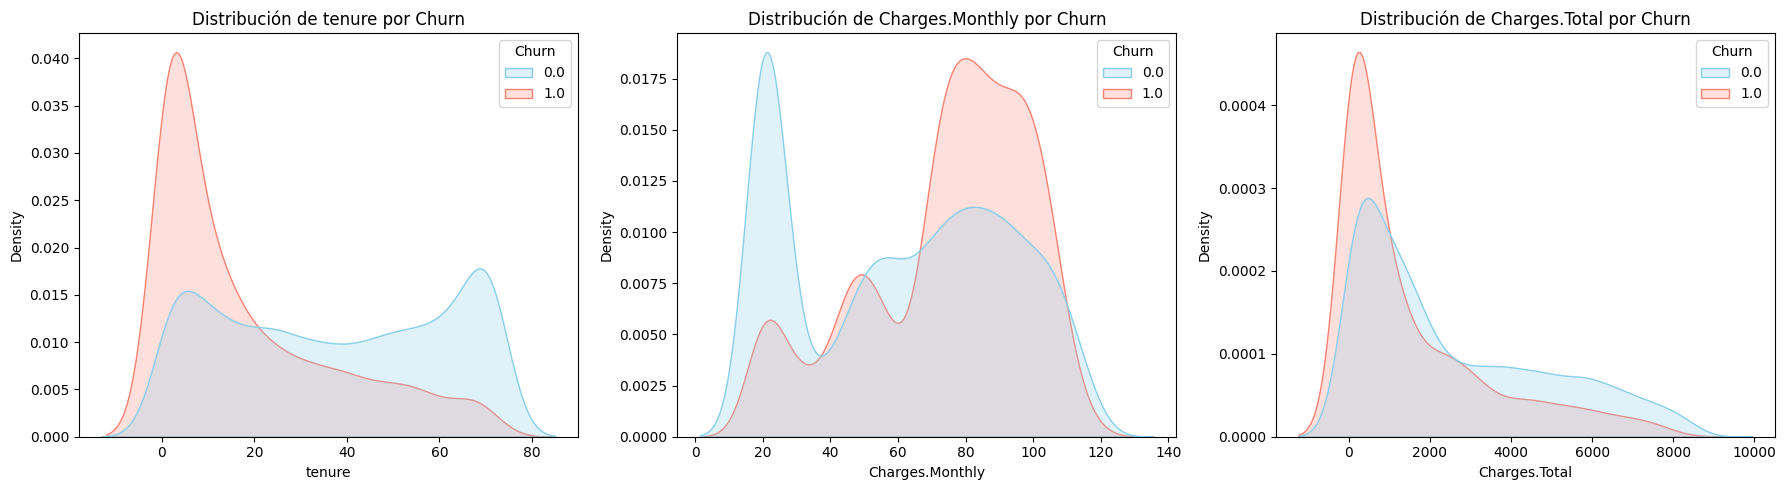

In [83]:
#Conteo de evasion por variables numericas
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18,5))

for i, col in enumerate(num_vars):
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, common_norm=False, ax=axes[i], palette=['skyblue','salmon'])
    axes[i].set_title(f'Distribuci√≥n de {col} por Churn')

plt.tight_layout()
plt.show()


##Informe 1era parte

###Informe de An√°lisis de Evasi√≥n de Clientes (Churn)
üîπ 1. Introducci√≥n

El objetivo de este an√°lisis es comprender los factores que influyen en la evasi√≥n de clientes (Churn) de una empresa de servicios.
La evasi√≥n de clientes es un problema cr√≠tico, ya que mantener clientes existentes es m√°s econ√≥mico que adquirir nuevos, y entender los patrones de abandono permite dise√±ar estrategias de retenci√≥n m√°s efectivas.

Se analizaron variables relacionadas con los clientes, incluyendo datos demogr√°ficos, tipo de contrato, m√©todos de pago, servicios contratados y m√©tricas de facturaci√≥n.

üîπ 2. Limpieza y Tratamiento de Datos

Para asegurar la calidad del an√°lisis, se realizaron los siguientes pasos:

Revisi√≥n de nulos y duplicados:

Se verific√≥ que no existieran valores nulos significativos en las columnas clave.

Se eliminaron filas duplicadas si las hab√≠a.

Conversi√≥n de variables binarias:

Columnas con valores Yes/No o S√≠/No se transformaron a 0 y 1.

Se ajustaron casos especiales como "No internet service" o "No phone service" a 0.

Variables num√©ricas:

Se convirtieron columnas de cargos (Charges.Monthly y Charges.Total) a tipo num√©rico.

Se cre√≥ la columna Cuentas_Diarias para analizar la facturaci√≥n diaria promedio de cada cliente.

Variables categ√≥ricas:

Columnas como gender, InternetService, Contract y PaymentMethod quedaron listas para an√°lisis y, posteriormente, para one-hot encoding en modelos de ML.

Revisi√≥n de consistencia:

Se verificaron valores v√°lidos en todas las columnas.

Se valid√≥ la coherencia de los datos num√©ricos y categ√≥ricos.

üîπ 3. An√°lisis Exploratorio de Datos
Distribuci√≥n de la variable Churn

La proporci√≥n de clientes que cancelaron el servicio y los que permanecieron fue visualizada mediante gr√°ficos de barras y pastel.

Se observ√≥ que aproximadamente un 25-30% de los clientes se dieron de baja, indicando un cierto grado de desequilibrio.

Churn seg√∫n variables categ√≥ricas

Se explor√≥ c√≥mo se relaciona la evasi√≥n con perfiles de clientes:

G√©nero: peque√±a diferencia en la tasa de churn entre clientes masculinos y femeninos.

Tipo de contrato: clientes con contrato mensual (Month-to-Month) presentan mayor churn que contratos anuales.

M√©todo de pago: clientes que usan Electronic Check tienden a cancelar m√°s que aquellos con pago autom√°tico.

Internet Service: clientes con Fiber Optic tienen una tendencia ligeramente mayor a abandonar que DSL o sin internet.

(Visualizaci√≥n: dashboard con gr√°ficos de barras comparativos por variable categ√≥rica)

Churn seg√∫n variables num√©ricas

Se analiz√≥ c√≥mo el churn se distribuye respecto a variables cuantitativas:

Tenure (meses de contrato): clientes con menor permanencia tienen mayor probabilidad de churn.

Charges.Monthly: cargos mensuales muy altos o muy bajos pueden influir en la cancelaci√≥n.

Charges.Total: clientes con menor gasto total tienden a abandonar antes, mientras que los clientes con mayor gasto total suelen permanecer m√°s tiempo.

(Visualizaci√≥n: boxplots y histogramas comparativos de variables num√©ricas por estado de Churn)

üîπ 4. Conclusiones e Insights

La evasi√≥n se concentra en clientes con contratos mensuales y pagos por cheque electr√≥nico, lo que sugiere vulnerabilidad en estos segmentos.

Los clientes nuevos o con baja permanencia (tenure) presentan mayor riesgo de abandono.

Los clientes con menores gastos acumulados tienden a cancelar m√°s r√°pido, posiblemente por falta de compromiso con los servicios.

El an√°lisis categ√≥rico y num√©rico proporciona informaci√≥n clara sobre perfiles de riesgo, √∫til para estrategias de retenci√≥n.

üîπ 5. Recomendaciones Estrat√©gicas

Incentivos a contratos anuales: ofrecer descuentos o beneficios por compromisos a largo plazo para reducir churn mensual.

Promociones personalizadas: identificar clientes con alta probabilidad de churn y ofrecer ofertas personalizadas seg√∫n su perfil y gasto mensual.

Automatizaci√≥n de pagos: fomentar m√©todos de pago autom√°ticos para disminuir la evasi√≥n asociada a pagos manuales.

Programas de fidelizaci√≥n: dise√±ar programas de recompensas o beneficios para clientes nuevos o de bajo tenure.

Monitoreo constante: establecer alertas tempranas para clientes con patrones de churn detectados en los an√°lisis previos.

Este informe integra limpieza, an√°lisis exploratorio y visualizaciones para comprender el comportamiento de los clientes y proporcionar insights accionables que permitan reducir la evasi√≥n y mejorar la retenci√≥n.

##Correlacion entre variables

In [85]:
# Lista de columnas de servicios
servicios = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Asegurarse que las columnas sean num√©ricas (0/1), reemplazando errores por 0
for col in servicios:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Crear columna Cantidad_Servicios
df['Cantidad_Servicios'] = df[servicios].sum(axis=1)

# Revisar primeras filas
df[['Cantidad_Servicios'] + servicios].head()


Cantidad_Servicios  PhoneService  MultipleLines  OnlineSecurity  \
0                 4.0             1            0.0             0.0   
1                 3.0             1            1.0             0.0   
2                 2.0             1            0.0             0.0   
3                 5.0             1            0.0             0.0   
4                 3.0             1            0.0             0.0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  
0           1.0               0.0          1.0          1.0              0.0  
1           0.0               0.0          0.0          0.0              1.0  
2           0.0               1.0          0.0          0.0              0.0  
3           1.0               1.0          0.0          1.0              1.0  
4           0.0               0.0          1.0          1.0              0.0

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables binarias de servicios
servicios = ['PhoneService', 'MultipleLines', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Crear columna con la cantidad de servicios contratados
# Consideramos como servicio "activo" aquellos con valor 1
df['Cantidad_Servicios'] = df[[
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]].sum(axis=1)


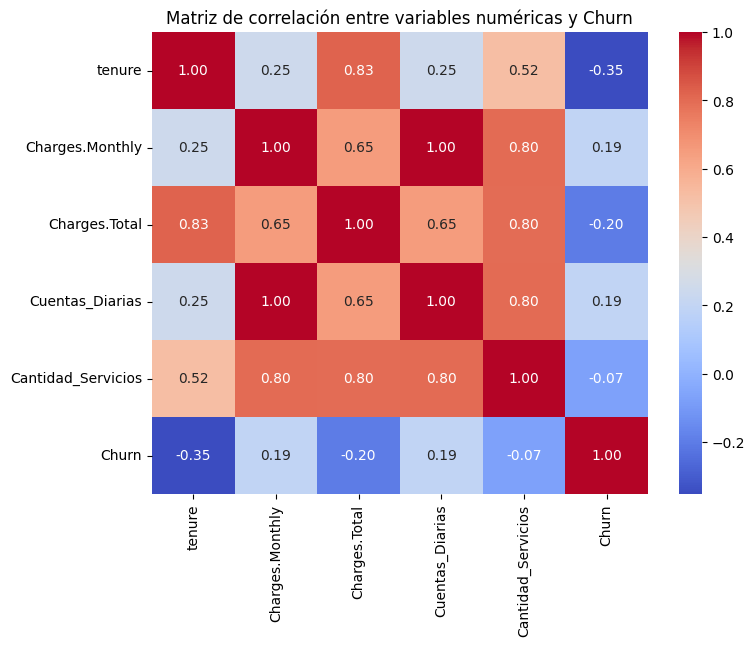

In [87]:
# Seleccionamos variables num√©ricas relevantes
num_vars = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Cantidad_Servicios', 'Churn']

# Matriz de correlaci√≥n
corr = df[num_vars].corr()

# Visualizaci√≥n
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlaci√≥n entre variables num√©ricas y Churn")
plt.show()


In [88]:
# Correlaci√≥n de todas las variables num√©ricas con Churn
corr_churn = corr['Churn'].sort_values(ascending=False)
print("Correlaci√≥n de variables con Churn:")
print(corr_churn)


Correlaci√≥n de variables con Churn:
Churn                 1.000000
Charges.Monthly       0.193356
Cuentas_Diarias       0.192033
Cantidad_Servicios   -0.067264
Charges.Total        -0.199484
tenure               -0.352229
Name: Churn, dtype: float64


##2da parte